<div class="alert alert-block alert-info">
<img src="./Imagenes/ITESO_Logo.png" style="width:500px;height:142px;" title="Logo ITESO">
<br><font face = "Times New Roman" size = "6"><b><center>Maestría en Sistemas Computacionales</center></b></font>
<br><font face = "Times New Roman" size = "5"><b><center>Programación para Análisis de Datos</center></b></font>

<b><br><font face = "Times New Roman" size = "4"><center>Unidad 5: Proceso de Selección de Métodos</center></font>
<font face = "Times New Roman" size = "4"><center>Tema 5.2: Redes Neuronales</center></font>
<font face = "Times New Roman" size = "4"><center>Subtema g: Clasificación de Imágenes</center></font></b>
</div>

## CLASIFICACIÓN DE IMÁGENES

### Descripción del DataSet

**Asirra (Animal Species Image Recognition for Restricting Access)** es un ***Host Integration Server (HIP)*** de **Microsoft** que funciona por medio de consultas a usuarios para identificar fotografías de perros y gatos. Esta tarea suele ser sumamente compleja para un equipo de cómputo, pero estudios han revelado que las personas pueden realizar esta tarea de manera más rápida y precisa. 

**Asirra** es único ya que tiene convenios con grandes compañías que hacen su uso, por ejemplo, con [PetFinder](https://www.petfinder.com), el cual es el sitio más grande a nivel mundial enfocado a encontrar hogares para animales. Ellos han proporcionado a **Microsoft** más de tres millones de imágenes de perros y gatos clasificadas totalmente pero de manera manual, esta información se ha recolectado de miles de refugios de animales a lo largo de los Estados Unidos.
<br>
<img src="./Imagenes/Kaggle_logo.png" style="width:240px;height:86px;" class="center">
<br>
Afortunadamente, existe un subgrupo de esa vasta base de datos, la cual está disponible a través de Kaggle [en esta liga](https://www.kaggle.com/c/dogs-vs-cats/data) llamada *Dogs vs. Cats*, con el objetivo de aplicarlo a procesos de investigación y desarrollo.

El DataSet de 812MB contiene 25,000 imágenes de perros y gatos con sus respectivas clasificaciones, esto para realizar el entrenamiento de una red. Adicionalmente contiene 15,000 imágenes para la etapa de prueba.

En el caso de este ejercicio, se han tomado solamente 1,000 imágenes (500 de perros y 500 de gatos) para hacer un DataSet más pequeño y sencillo de entrenar, adicionalmente se cuenta con 101 imágenes de prueba. 

**El problema consiste en entrenar una red neuronal en base a datos ya clasificados, para con ello poder prederir el tipo de animal (perro o gato) presente en una imagen. Por lo mismo, se enfoca a solo 2 clases.**

Comenzaremos mostrando de manera aleatoria una imagen de cada tipo, contenidas dentro de los datos de *entrenamiento (train)*. Para ello se empleará la librería **SciKit-Image** (***skimage***) que ya se había empleado en sesiones previas del curso.

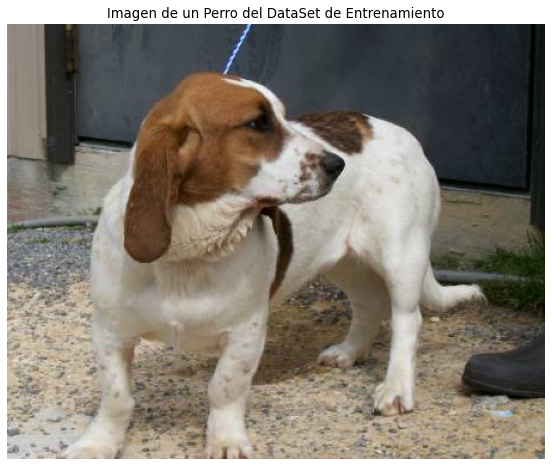

Dimensiones de la imagen: (364, 450, 3)


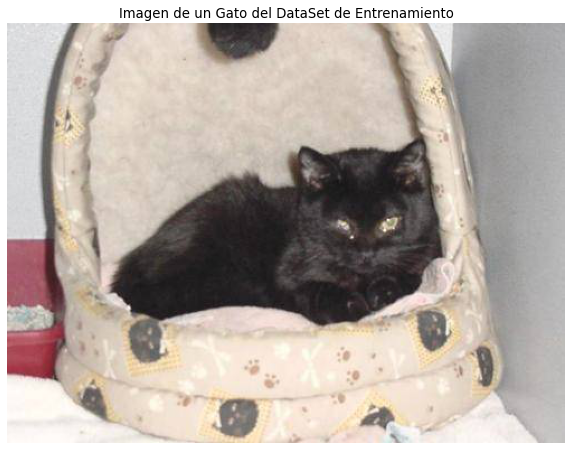

Dimensiones de la imagen: (375, 499, 3)


In [1]:
#Importación de librerías
import matplotlib.pyplot as plt
import random
from skimage import io                  

#Definición de los parámetros de los gráficos
plt.rcParams.update({'font.size': 11, 'figure.figsize': (10, 8)}) 

#Cargar y mostrar una imagen aleatoria de un perro desde el DataSet de Entrenamiento
dog_img = io.imread("./Data_DogCat/train/dog.{}.jpg".format(random.randint(0,499)))
plt.imshow(dog_img, origin=None)      
plt.axis('off')
plt.title("Imagen de un Perro del DataSet de Entrenamiento")
plt.show()
print("Dimensiones de la imagen:", dog_img.shape) 

#Cargar y mostrar una imagen aleatoria de un gato desde el DataSet de Entrenamiento
cat_img = io.imread("./Data_DogCat/train/cat.{}.jpg".format(random.randint(0,499)))
plt.imshow(cat_img, origin=None)        
plt.axis('off')
plt.title("Imagen de un Gato del DataSet de Entrenamiento")
plt.show()
print("Dimensiones de la imagen:", cat_img.shape) 

Se tendrán dos categorías de clasificación (*etiquetas o labels*), las cuales son `dog` y `cat`.

Se comenzará preparando un **DataFrame** de **Pandas**, con el objetivo de recolectar las etiquetas de todos los archivos de entrenamiento (500 imágenes para cada etiqueta). El **DataFrame** tendrá los elementos:

* `filename`: Nombre del archivo.
* `category`: Categoría a la que pertenece el archivo, ya sea `dog` o `cat`.

In [2]:
#Importación de librerías
import pandas as pd
import os

#Creación del DataFrame
filenames = os.listdir('./Data_DogCat/train')
categories = []

#Asignación de los nombres y categorías desde los archivos de entrenamiento
for filename in filenames:
  category = filename.split('.')[0]
  if category == 'dog':
    categories.append('dog')
  else:
    categories.append('cat')

#Asignación al DataFrame
dog_cat_df = pd.DataFrame({'filename': filenames,'category': categories})
dog_cat_df.head(10)

,filename,category
0,cat.6.jpg,cat
1,dog.211.jpg,dog
2,dog.205.jpg,dog
3,dog.239.jpg,dog
4,cat.239.jpg,cat
5,cat.211.jpg,cat
6,cat.205.jpg,cat
7,dog.365.jpg,dog
8,dog.403.jpg,dog
9,dog.417.jpg,dog


A continuación se realizarán algunas operaciones de preparación de los datos. Para ello se empleará la librería **SciKit-Learn**, la cual contiene herramientas simples y eficientes para análisis predictivo de datos.
<br>
<img src="./Imagenes/scikit.png" style="width:200px;height:108px;" class="center">
<br>
La documentación de **SciKit-Learn** se puede encontrar a través [de esta liga](https://scikit-learn.org/stable/).

Los pasos a seguir son:
1. Extracción de **DataFrames** de entrenamiento y prueba de manera aleatoria empleando el método `train_test_split()` aplicado al **DataFrame** original.

In [3]:
#Importación de librerías
from sklearn.model_selection import train_test_split

#Extracción de DataFrames de entrenamiento y prueba
train_df, test_df = train_test_split(dog_cat_df, test_size = 0.2)

#Revisión de los tamaños de los DataFrames
print("\nEl tamaño del DataFrame de entrada es:", dog_cat_df.shape)
print("El tamaño del DataFrame para entrenamiento es:", train_df.shape)
print("El tamaño del DataFrame para prueba es:", test_df.shape)


El tamaño del DataFrame de entrada es: (1000, 2)
El tamaño del DataFrame para entrenamiento es: (800, 2)
El tamaño del DataFrame para prueba es: (200, 2)


Ahora se realiza un preprocesamiento de las imágenes a través de la función `ImageDataGenerator` de **Keras**. Para ello se empleará el método `.flow_from_dataframe()`, el cual permite tomar un **DataFrame** que contiene los nombres de los archivos y sus respectivas categorías de clasificación, y directamente lee las imágenes desde la ubicación especificada y mapeadas con la respectiva categoría. 

Para ello, primero se realiza una normalización de las imágenes (proceso normal para ajustar los valores de 0-255 a la escala de 0-1), y posteriormente se aplica el método `.flow_from_dataframe()` para generar los datos de las imágenes para el entrenamiento y para las pruebas de manera independiente:
 
1. Se indica el **DataFrame** desde donde se leen los datos.
2. Se indica el directorio desde donde se leeran las imágenes.
3. Se indica la columna del **DataFrame** que contiene los nombres de archivos con `x_col`.
4. Se indica la columna del **DataFrame** que contiene las categorías de cada archivo con `y_col`.
5. Se indica el tamaño al que se van a ajustar todas las imágenes con `target_size`.
6. Se especifica que las imágenes son arreglos 2-dimensionales de **NumPy** con `class_mode='categorical'`.
7. Se especifica el número de lotes (*batch*) a emplear por medio de `batch_size`.

Se puede consultar más información sobre el método `.flow_from_dataframe()` de **Keras** [en esta liga](https://keras.io/preprocessing/image/).

In [4]:
#Importación de librerías
from keras.preprocessing.image import ImageDataGenerator

#Normalización de las Imágenes
datagen = ImageDataGenerator(rescale=1.0/255.0)

#Generador de Imágenes de Entrenamiento
traingenerator = datagen.flow_from_dataframe(train_df , './Data_DogCat/train', 
                                             x_col = 'filename' , 
                                             y_col = 'category', 
                                             target_size = (224,224),
                                             class_mode='categorical', 
                                             batch_size = 32)

#Generador de Imágenes de Prueba
testgenerator = datagen.flow_from_dataframe( test_df , './Data_DogCat/train',
                                             x_col = 'filename' , 
                                             y_col = 'category', 
                                             target_size = (224,224),
                                             class_mode='categorical', 
                                             batch_size = 32)

Found 800 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


Se prepara una **Red Neuronal** basada en el modelo secuencial (`Sequential`) de **Keras** a través de la librería **TensorFlow**, el cual consiste en una apilación (*stack*) lineal de capas (*layers*), esto es, se puede crear un modelo secuencial pasando la lista de capas a través del método `.add()`. Como características:

1. Se emplearán capas del tipo `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, `BatchNormalization` y `Dropout`.
2. Se emplearán funciones de activación del tipo `relu` y `softmax`.

Las capas (*layers*) de **Keras** disponibles a través de la librería **TensorFlow** se pueden consultar [en esta liga](https://www.tensorflow.org/api_docs/python/tf/keras/layers).

Las funciones de activación disponibles en **TensorFlow** se pueden consultar [en esta liga](https://www.tensorflow.org/api_docs/python/tf/keras/activations).

In [5]:
#Importación de la Librería TensorFlow
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

#Preparación del Modelo
model = tf.keras.Sequential()

model.add(Conv2D(32, (5,5), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) #Son 2 debido a que son solo dos clases (perro o gato)

#Configuración del modelo de entrenamiento
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Se puede visualizar una representación del modelo de la **Red Neuronal** creada con **TensorFlow**. Para ello se emplea el método `.summary()` aplicado al modelo. Esto es:

In [6]:
#Visualización de la Red Neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 256)       8

Ahora se realiza el entrenamiento por un cierto número de épocas (*epochs*), las cuales son las iteraciones que se realizan. Para ello se emplea el método `.fit()` de **Keras**. Para ello:

* Se proporcionan los datos de entrada de entrenamiento (*traingenerator*).
* Se define la cantidad de épocas a emplear (`epochs`).
* Se define la información que se usará para validar a través de `validation_data`.
* Se define la cantidad de pasos a realizar con `validation_data` a través de `validation_steps`.
* Se define la cantidad de pasos de cada época por medio de `steps_per_epoch`.

La descripción detallada del método `.fit()` se puede consultar [en esta liga](https://keras.io/models/sequential/).

***Nota:*** El entrenamiento por época puede llevar alrededor de 100 segundos.

In [7]:
#Entrenamiento del modelo para 200 épocas
history = model.fit(
    traingenerator, 
    epochs = 200,
    validation_data = testgenerator,
    validation_steps= len(testgenerator),
    steps_per_epoch = len(traingenerator))

Epoch 1/200
25/25 [==============================] - 116s 5s/step - loss: 0.8717 - accuracy: 0.5150 - val_loss: 1.3639 - val_accuracy: 0.5100
Epoch 2/200
25/25 [==============================] - 109s 4s/step - loss: 0.8127 - accuracy: 0.5312 - val_loss: 2.9949 - val_accuracy: 0.5100
Epoch 3/200
25/25 [==============================] - 105s 4s/step - loss: 0.7887 - accuracy: 0.5450 - val_loss: 11.0024 - val_accuracy: 0.5100
Epoch 4/200
25/25 [==============================] - 114s 5s/step - loss: 0.8092 - accuracy: 0.5312 - val_loss: 2.6305 - val_accuracy: 0.5100
Epoch 5/200
25/25 [==============================] - 106s 4s/step - loss: 0.7357 - accuracy: 0.5713 - val_loss: 0.7276 - val_accuracy: 0.5600
Epoch 6/200
25/25 [==============================] - 103s 4s/step - loss: 0.7236 - accuracy: 0.6000 - val_loss: 0.7584 - val_accuracy: 0.5650
Epoch 7/200
25/25 [==============================] - 103s 4s/step - loss: 0.7206 - accuracy: 0.5863 - val_loss: 0.9171 - val_accuracy: 0.5150
Epoch

Epoch 115/200
25/25 [==============================] - 94s 4s/step - loss: 0.0156 - accuracy: 0.9962 - val_loss: 1.6896 - val_accuracy: 0.6650
Epoch 116/200
25/25 [==============================] - 103s 4s/step - loss: 0.0433 - accuracy: 0.9812 - val_loss: 1.9947 - val_accuracy: 0.6750
Epoch 117/200
25/25 [==============================] - 97s 4s/step - loss: 0.0136 - accuracy: 0.9950 - val_loss: 1.5265 - val_accuracy: 0.6950
Epoch 118/200
25/25 [==============================] - 97s 4s/step - loss: 0.0135 - accuracy: 0.9962 - val_loss: 2.0126 - val_accuracy: 0.6550
Epoch 119/200
25/25 [==============================] - 94s 4s/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 1.6385 - val_accuracy: 0.6900
Epoch 120/200
25/25 [==============================] - 96s 4s/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 1.4539 - val_accuracy: 0.6800
Epoch 121/200
25/25 [==============================] - 96s 4s/step - loss: 0.0166 - accuracy: 0.9937 - val_loss: 1.3513 - val_accuracy: 0.695

Epoch 172/200
25/25 [==============================] - 96s 4s/step - loss: 4.0349e-04 - accuracy: 1.0000 - val_loss: 1.8125 - val_accuracy: 0.6700
Epoch 173/200
25/25 [==============================] - 97s 4s/step - loss: 2.8889e-04 - accuracy: 1.0000 - val_loss: 1.8318 - val_accuracy: 0.6700
Epoch 174/200
25/25 [==============================] - 93s 4s/step - loss: 0.0024 - accuracy: 0.9987 - val_loss: 1.9319 - val_accuracy: 0.7000
Epoch 175/200
25/25 [==============================] - 98s 4s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.1838 - val_accuracy: 0.6600
Epoch 176/200
25/25 [==============================] - 99s 4s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8463 - val_accuracy: 0.6300
Epoch 177/200
25/25 [==============================] - 97s 4s/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 2.4112 - val_accuracy: 0.6650
Epoch 178/200
25/25 [==============================] - 97s 4s/step - loss: 8.2031e-04 - accuracy: 1.0000 - val_loss: 1.9709 - val_accu

Ahora se muestra el gráfico del nivel de asertividad (*accuracy*) a través de las épocas (*epoch*) de entenamiento, con lo cual se puede realizar una comparativa de su desempeño.

La documentación de **Keras** recomienda emplear el código mostrado a continuación, el cual puede ser consultado [en esta liga](https://keras.io/visualization/#training-history-visualization).

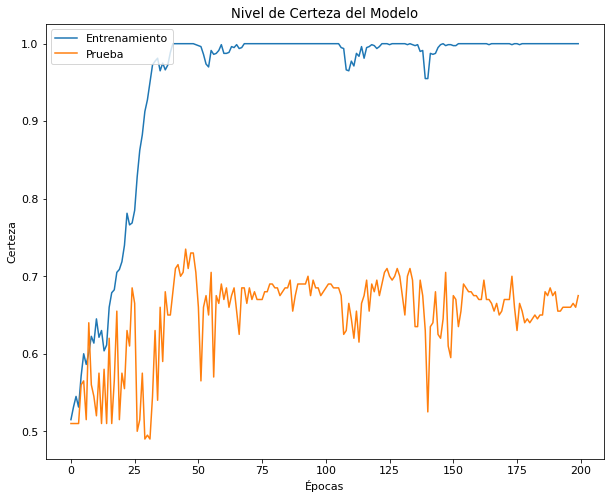

In [8]:
#Resumen del entrenamiento por medio de la asertividad (accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Nivel de Certeza del Modelo')
plt.ylabel('Certeza')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

Ahora se muestra el gráfico del nivel de pérdida (*loss*) a través de las épocas (*epoch*) de entenamiento, con lo cual se puede realizar una comparativa de su desempeño.

La documentación de **Keras** recomienda emplear el código mostrado a continuación, el cual puede ser consultado [en esta liga](https://keras.io/visualization/#training-history-visualization).

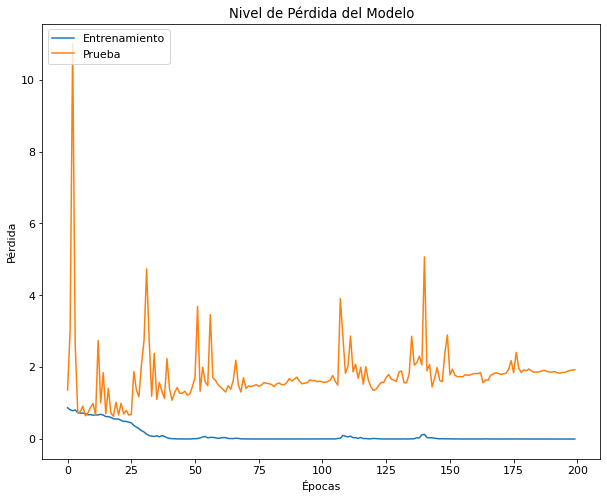

In [9]:
#Resumen del entrenamiento por medio de la pérdida (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Nivel de Pérdida del Modelo')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

Se generará un **Diccionario** en el cual se contengan las categorías clasificación de las imágenes (en este caso son solamente dos: `cat` y `dog`.

In [10]:
#Generar un Diccionario con las Categorías de Clasificación de las Imágenes
traingenerator.class_indices
labels = (traingenerator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print("Las categorías de clasificación de las imágenes son:", labels)

Las categorías de clasificación de las imágenes son: {0: 'cat', 1: 'dog'}


Ahora se define una función de **Python** la cual recibe el modelo entrenado y la ubicación de un archivo de prueba, y entrega la clasificación del contenido de la imágen.

In [11]:
#Importación de Librerías
import numpy as np
from skimage.transform import resize

#Definir una Función para Pruebas
def test_the_model(model, image_path):
  img = io.imread(image_path)
  
  plt.imshow(img, origin=None)
  plt.axis('off')
  plt.title("Imagen de Prueba")
    
  img = resize(img,(224,224))
  img = np.reshape(img,(1,224,224,3))
  img = img/255.0

  prediction = model.predict(img)
  prediction = np.argmax(prediction)
  
  labels = (traingenerator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  
  return labels[prediction]

Para probar el modelo, llamamos a la función `test_the_model` con una imagen de prueba e imprimimos el resultado:

La categoría para la imagen de prueba es: cat


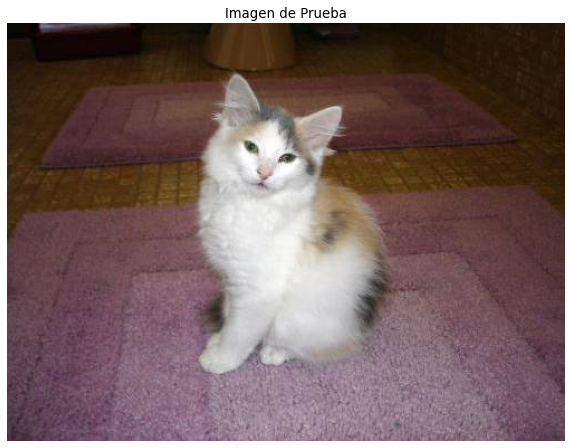

In [12]:
#Llamado a la Función test_the_model para probar el modelo
print('La categoría para la imagen de prueba es:', test_the_model(model, './Data_DogCat/test/10.jpg'))

Ahora, es posible guardar la historia del entrenamiento que se obtuvo con el método `model.fit_generator` en un archivo CSV, esto puede ser de utilidad para un análisis posterior de los datos:

In [13]:
#Guardar la Historia del Entrenamiento en formato CSV
history_df = pd.DataFrame(history.history) 
with open('./Data_DogCat/history/history.csv', mode='w') as f:
    history_df.to_csv(f)

De igual manera, es posible guardar el modelo a traves de la función `model.save`, la cual guarda la arquitectura del modelo, sus pesos, y la configuración de entrenamiento en un solo archivo. Esto permite exportar un modelo para que pueda ser usado sin acceso al código original. Debido a que el estado de optimización también es recuperado, puede continuarse un proceso de entrenamiento desde donde se dejó.

El modelo completo puede ser guardado en distintos formatos (`SavedModel` y `HDF5`). Para **TensorFlow**, el formato `SavedModel` es el predeterminado a través de la extensión `TF2`. Sin embargo, el modelo puede ser guardado también en un formato `HDF5`.

La descripción detallada de la función `model.save` se puede encontrar [en esta liga](https://www.tensorflow.org/tutorials/keras/save_and_load).

In [14]:
#Warnings OFF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#Guardado del Modelo
model.save('./Data_DogCat/model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./Data_DogCat/model/assets


Ahora, se puede cargar ese modelo guardado como un nuevo modelo empleando el método `.load_model()` de **Keras** a través de la librería de **TensorFlow** de la siguiente manera:

In [15]:
#Cargar el Modelo
new_model = tf.keras.models.load_model('./Data_DogCat/model')

Para probarlo, volvemos a invocar la función `test_the_model` pero con el nuevo modelo que se ha cargado:

La categoría para la imagen de prueba es: cat


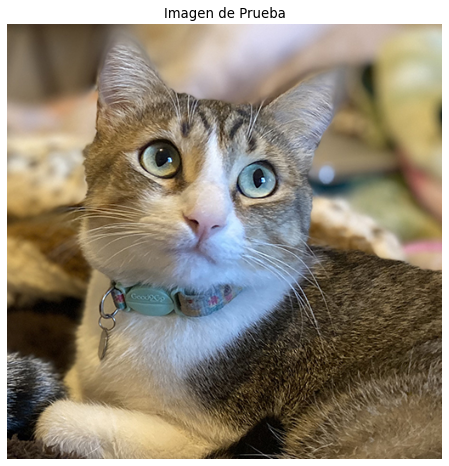

In [16]:
#Llamado a la Función test_the_model para probar el modelo
print('La categoría para la imagen de prueba es:', test_the_model(new_model, './Imagenes/Lily.jpg'))

<div class="alert alert-block alert-danger">
<b>.: Fin del Tema :.</b>
</div>